$\hat{y}(i) = a_0 + a_1x_1(i) + a_2x_2(i)$

In [29]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [30]:
# Sets the number of examples.
M = 1000

# Create target function.
x0 = np.ones((M,1))
x = np.random.uniform(-5,5,(M,1))
x2 = np.random.uniform(-5,5,(M,1))
X = np.c_[x0,x,x2]
y = 2 + 2*x + 2*x2 + np.random.normal(0,1,(M, 1))


In [31]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
#yhat = a_opt[0,0] + a_opt[1,0]*x + a_opt[2,0]*x**2
yhat = a_opt[0,0] + a_opt[1,0]*x + a_opt[2,0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

print(Joptimum)

1.0130900764183821


In [32]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.05

# Random initialization of parameters.
a = np.zeros((3,1))
a[0,0] = -10
a[1,0] = -10
a[2,0] = -10

# Create vector for parameter history.
a_hist = np.zeros((3, M+1))
# Initialize history vector.
a_hist[0, 0] = a[0,0]
a_hist[1, 0] = a[1,0]
a_hist[2, 0] = a[2,0]

# Create array for storing error values.
Jgd = np.zeros(M+1)

#yhat = a[0,0] + a[1,0]*x + a[2,0]*x**2
yhat = a[0,0] + a[1,0]*x + a[2,0]*x2

Jgd[0] = (1/M)*sum(np.power(y - yhat, 2))

# Batch gradient-descent loop.
iteration = 0
grad_hist = np.zeros((3, M))

while iteration < M:
    gradients = -(2/M) * X.T.dot(y - yhat)
    grad_hist[0, iteration] = gradients[0,0]
    grad_hist[1, iteration] = gradients[1,0]
    grad_hist[2, iteration] = gradients[2,0]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0,0]
    a_hist[1, iteration+1] = a[1,0]
    a_hist[2, iteration+1] = a[2,0]
    yhat = a[0,0] + a[1,0]*x + a[2,0]*x2
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - yhat) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

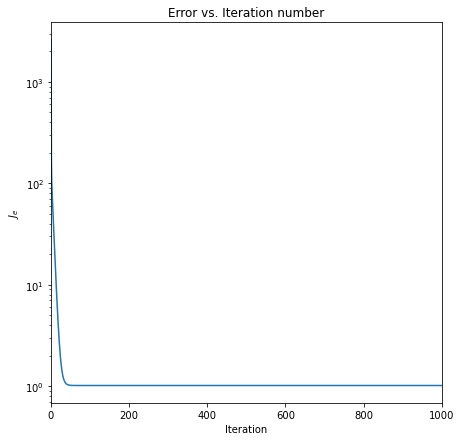

In [33]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

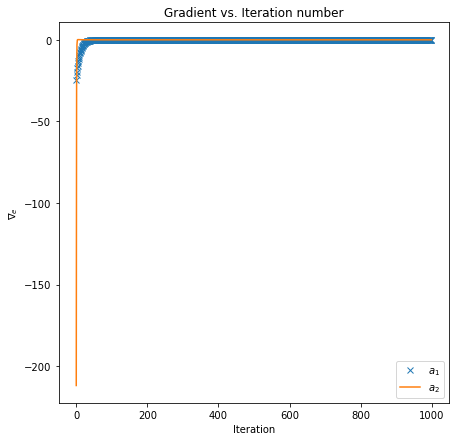

In [34]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

In [35]:
print(f'O valor ótimo de a0 encontrado pela fórmula fechada é: {a_opt[0,0]}')
print(f'O valor ótimo de a1 encontrado pela fórmula fechada é: {a_opt[1,0]}')
print(f'O valor ótimo de a2 encontrado pela fórmula fechada é: {a_opt[2,0]}')

print(f'O valor ótimo de a0 encontrado pelo GD batelada é: {a[0,0]}')
print(f'O valor ótimo de a1 encontrado pela GD batelada é: {a[1,0]}')
print(f'O valor ótimo de a2 encontrado pela GD batelada é: {a[2,0]}')

O valor ótimo de a0 encontrado pela fórmula fechada é: 2.0301817244868317
O valor ótimo de a1 encontrado pela fórmula fechada é: 2.000904958050451
O valor ótimo de a2 encontrado pela fórmula fechada é: 1.991821010320097
O valor ótimo de a0 encontrado pelo GD batelada é: 2.0301817244868303
O valor ótimo de a1 encontrado pela GD batelada é: 2.0009049580504503
O valor ótimo de a2 encontrado pela GD batelada é: 1.9918210103200988
